### Perceptrons for Classification


- Make sure to install sklearn library.
- %pip install -U scikit-learn


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd


- Load the data Faces in the Wild from sklearn.datasets 

In [3]:
data = pd.read_excel(r'C:\Users\Basil\OneDrive\Documents\Lab_01_data.xlsx')

print(data)
d = data.pop('d')


    Sample      x1      x2       x3  d
0        1 -0.6508  0.1097   4.0009 -1
1        2 -1.4492  0.8896   4.4005 -1
2        3  2.0850  0.6876  12.0710 -1
3        4  0.2626  1.1476   7.7985  1
4        5  0.6418  1.0234   7.0427  1
5        6  0.2569  0.6730   8.3265 -1
6        7  1.1155  0.6043   7.4446  1
7        8  0.0914  0.3399   7.0677 -1
8        9  0.0121  0.5256   4.6316  1
9       10 -0.0429  0.4660   5.4323  1
10      11  0.4340  0.6870   8.2287 -1
11      12  0.2735  1.0287   7.1934  1
12      13  0.4839  0.4851   7.4850 -1
13      14  0.4089 -0.1267   5.5019 -1
14      15  1.4391  0.1614   8.5843 -1
15      16 -0.9115 -0.1973   2.1962 -1
16      17  0.3654  1.0475   7.4858  1
17      18  0.2144  0.7515   7.1699  1
18      19  0.2013  1.0014   6.5489  1
19      20  0.6483  0.2183   5.8991  1
20      21 -0.1147  0.2242   7.2435 -1
21      22 -0.7970  0.8795   3.8762  1
22      23 -1.0625  0.6366   2.4707  1
23      24  0.5307  0.1285   5.6883  1
24      25 -1.2200  0.777

In [4]:
tf_dataset = tf.data.Dataset.from_tensor_slices((data.values, d.values))
x,y = [],[]
for feature,value in tf_dataset.as_numpy_iterator() :
    x.append(feature)
    y.append(value)
    
x

[array([ 1.    , -0.6508,  0.1097,  4.0009]),
 array([ 2.    , -1.4492,  0.8896,  4.4005]),
 array([ 3.    ,  2.085 ,  0.6876, 12.071 ]),
 array([4.    , 0.2626, 1.1476, 7.7985]),
 array([5.    , 0.6418, 1.0234, 7.0427]),
 array([6.    , 0.2569, 0.673 , 8.3265]),
 array([7.    , 1.1155, 0.6043, 7.4446]),
 array([8.    , 0.0914, 0.3399, 7.0677]),
 array([9.    , 0.0121, 0.5256, 4.6316]),
 array([10.    , -0.0429,  0.466 ,  5.4323]),
 array([11.    ,  0.434 ,  0.687 ,  8.2287]),
 array([12.    ,  0.2735,  1.0287,  7.1934]),
 array([13.    ,  0.4839,  0.4851,  7.485 ]),
 array([14.    ,  0.4089, -0.1267,  5.5019]),
 array([15.    ,  1.4391,  0.1614,  8.5843]),
 array([16.    , -0.9115, -0.1973,  2.1962]),
 array([17.    ,  0.3654,  1.0475,  7.4858]),
 array([18.    ,  0.2144,  0.7515,  7.1699]),
 array([19.    ,  0.2013,  1.0014,  6.5489]),
 array([20.    ,  0.6483,  0.2183,  5.8991]),
 array([21.    , -0.1147,  0.2242,  7.2435]),
 array([22.    , -0.797 ,  0.8795,  3.8762]),
 array([23. 

- Now we have to standardize the training and test sets by removing the mean and scaling to unit variance.

In [5]:

scaler = StandardScaler()
scaler.fit(x)

Xtrs =  scaler.transform(x)


- We plot two features from the training dataset according to their labels.

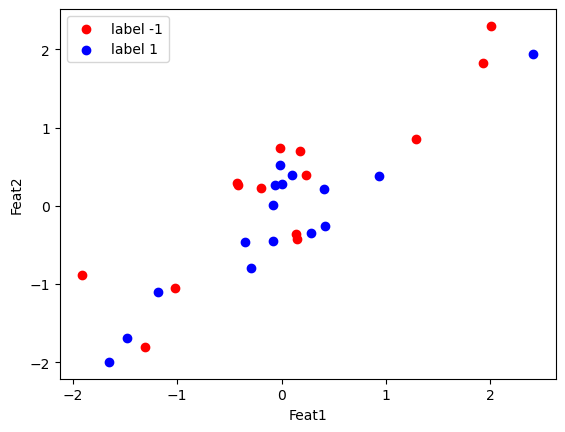

In [6]:


ntr = Xtrs.shape[0]
feat1_neg = [Xtrs[ii,1] for ii in range(0, ntr) if y[ii]==-1]
feat2_neg = [Xtrs[ii,3] for ii in range(0, ntr) if y[ii]==-1]
feat1_pos = [Xtrs[ii,1] for ii in range(0, ntr) if y[ii]==1]
feat2_pos = [Xtrs[ii,3] for ii in range(0, ntr) if y[ii]==1]

plt.scatter(feat1_neg, feat2_neg, color = "r", label="label -1")
plt.scatter(feat1_pos, feat2_pos, color = "b", label="label 1")
plt.legend()
plt.xlabel('Feat1')
plt.ylabel('Feat2')
plt.show()

- Complete the class Perceptron_Classifier

In [7]:
class Perceptron_Classifier:

    def __init__(self, dim,eta=0.1):
        self.w = np.zeros((dim, 1))
        self.ws = [self.w.copy()]
        self.eta = 1e-1
        
    def predict(self,x):
        pred = x @ self.w
        return np.sign(pred)
        
    def model_update(self,x,y,pred):
        self.w = self.w + (self.eta *((y-pred) * x[:,np.newaxis]))


- Compute the accuracy of training and test sets for each epoch, and hold them in two lists.

In [11]:
Xtrs1 = np.insert(Xtrs, 0, 1, axis=1) 

epoch = 50

ptr = []
acctr = []
#accte = []

model = Perceptron_Classifier(dim=Xtrs1.shape[1],eta=0.1)

for itr in range(epoch):
    tr_miss = 0
    for i in range(Xtrs.shape[0]):
                      
        predict = model.predict(Xtrs1[i, :])
        
        if y[i] != predict:                   
            model.model_update(Xtrs1[i, :],y[i],predict)  
            tr_miss += 1
    ptr.append(tr_miss)
    acctr.append(accuracy_score(y, model.predict(Xtrs1)))
w = model.w.copy()

In [12]:
print('Accuracy on train set =', accuracy_score(y, model.predict(Xtrs1)))

Accuracy on train set = 0.9666666666666667


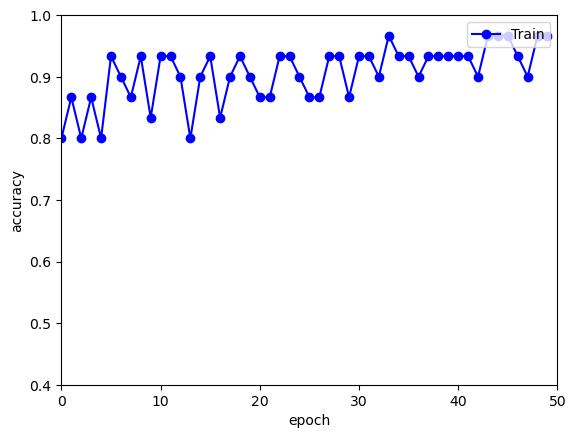

In [13]:
xs = [i for i in range(0,epoch)]
plt.plot(xs, acctr,"ob-", label="training")
plt.xlim(0, epoch)
plt.ylim(0.4, 1)
plt.legend(('Train', 'Test'),loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
